PyTorch Workflow

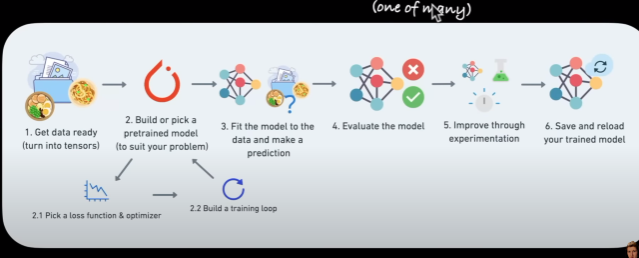

In [2]:
What_were_covering = {1: "Data Preparing",
                      2: "Build Model",
                      3: "Fitting the model to data",
                      4: "Making predictions and evluating a model",
                      5: "Saving&Load Model",
                      6: "Putting it all together"}
What_were_covering

{1: 'Data Preparing',
 2: 'Build Model',
 3: 'Fitting the model to data',
 4: 'Making predictions and evluating a model',
 5: 'Saving&Load Model',
 6: 'Putting it all together'}

In [3]:
import torch
from torch import nn # NN contains all of PyTorch's building blocks for neural networks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.0.1+cu118


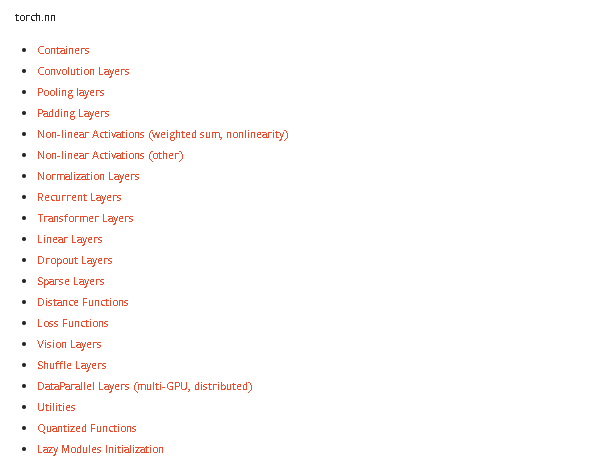

## 1.Data (Preparing)

In [4]:
weight = 0.7 # (B)
bias = 0.3   # (a)


start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [5]:
y = weight * X + bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

### Splitting data into training and test sets

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [7]:
X_train[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

# Creating our first PyTorch model for Lineer Regression

In [8]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):
  # Torch.nn.Module: Base class for all NN modules, your models should also subclass this class
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    #Requeires_drad, if the parameter requires gradient
    self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype= torch.float))


    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # This is the linear regression formula  ax+b


What our model does:

* Start with random vlaues (weight * bias)
* Look at training data and adjust the random values to better represent the ideal values


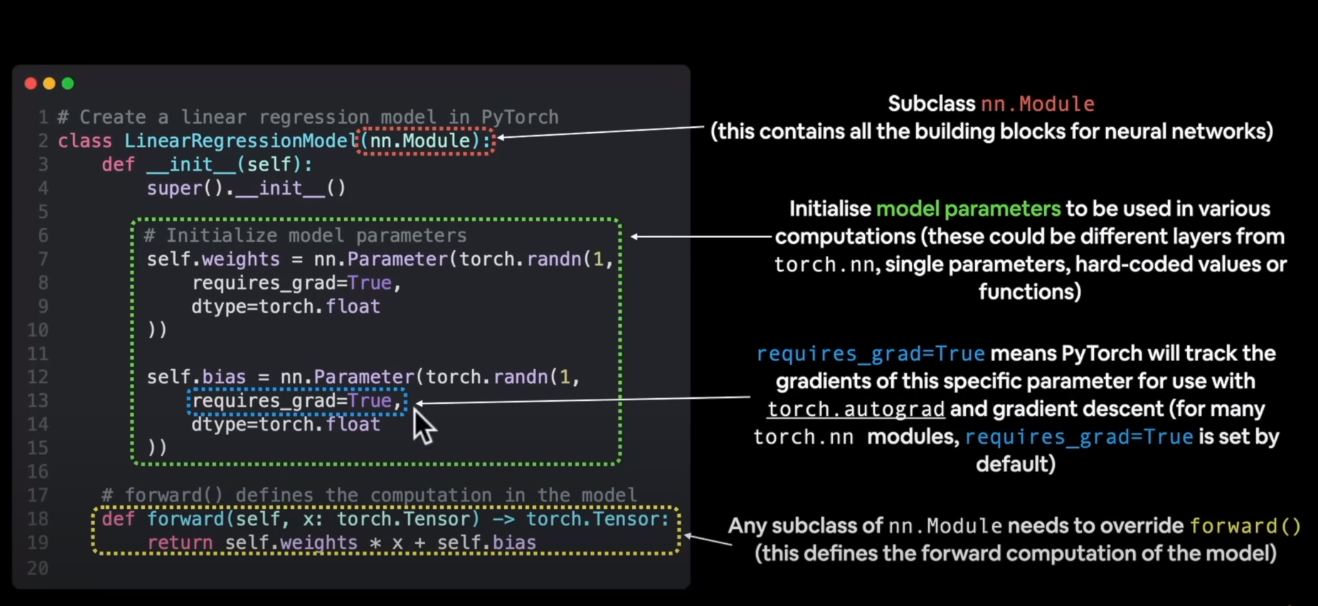

### PyTorch model building essentials

* Torch.nn - contains all of the buildings for computational graphs (another word for neural networks)
* Torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set for us
* Torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* Torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses requre you to overwrite forward()

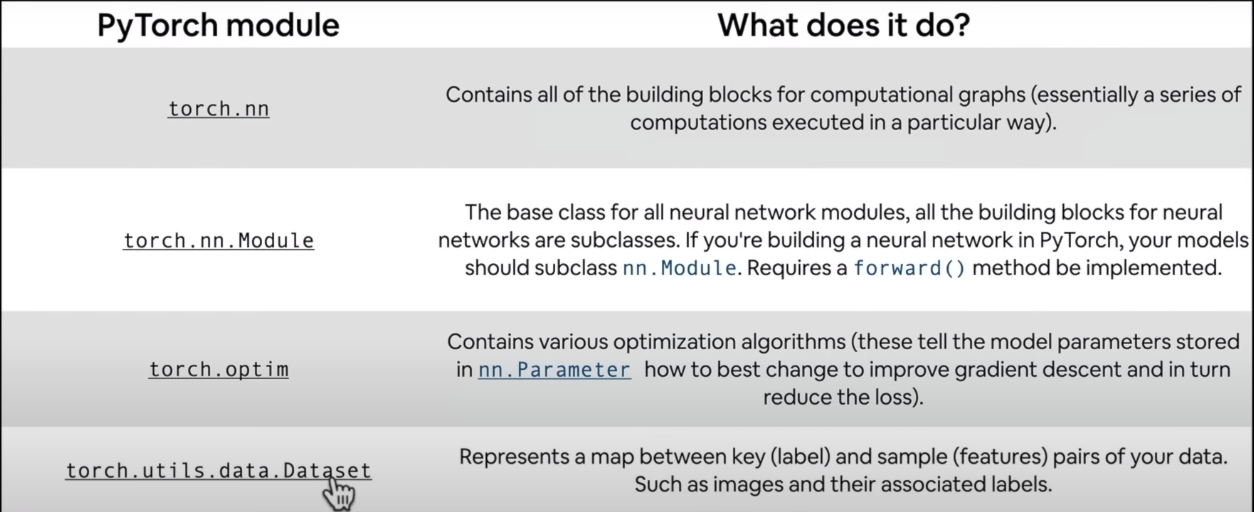

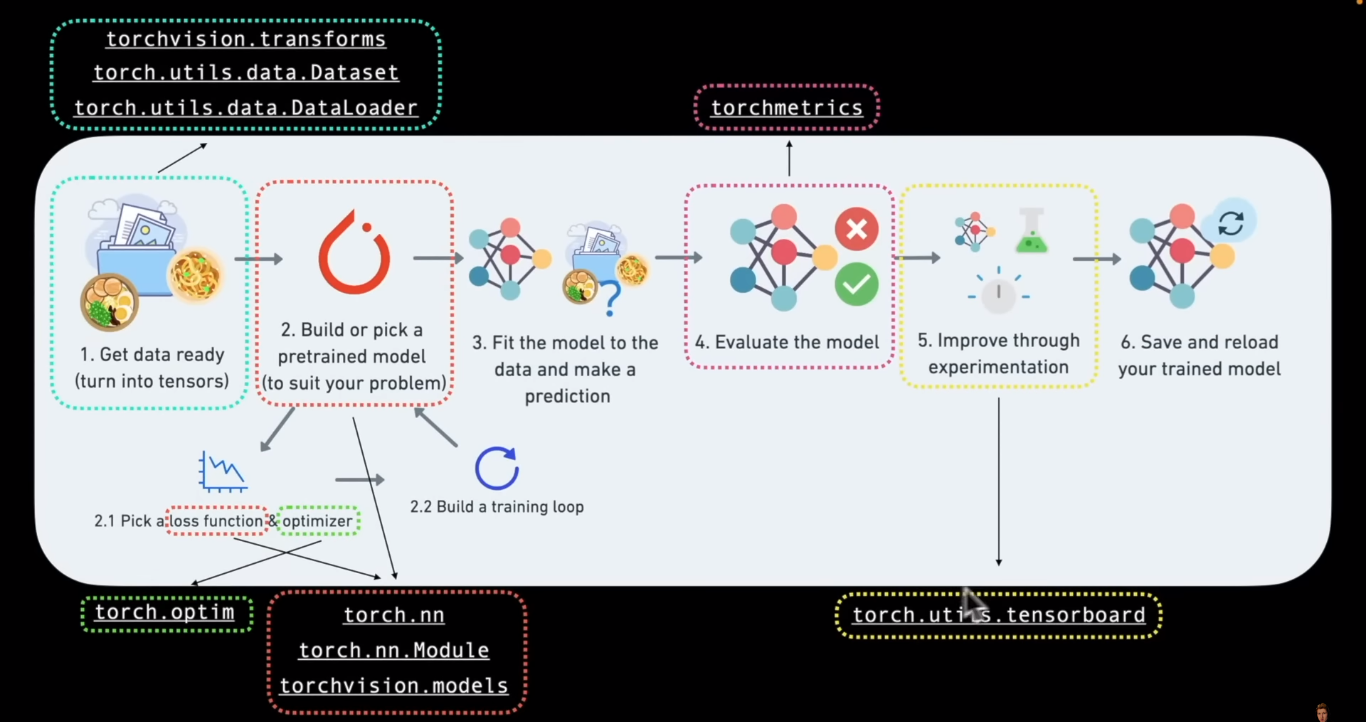

### Checking the contents of our PyTorch model


# Making Predictions

In [9]:
model_0 = LinearRegressionModel()

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred[:5]

tensor([[-0.1343],
        [-0.1497],
        [-0.1651],
        [-0.1804],
        [-0.1958]])

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [11]:
X_train.ndim, y_train.ndim, X_test.ndim, y_test.ndim

(2, 2, 2, 2)

In [12]:
# Want to make your inferece code in PyTorch run faster ? Here's a quick thread on doing exactly that
# Replace torch.no_grad(

with torch.no_grad():
  y_preds = model_0(X_test)
y_preds[:10]

tensor([[-0.1343],
        [-0.1497],
        [-0.1651],
        [-0.1804],
        [-0.1958],
        [-0.2111],
        [-0.2265],
        [-0.2419],
        [-0.2572],
        [-0.2726]])

## 3. Train model

the whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

Or in the other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models prediction are is to use a loss function

**Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Optimizer:** Takes into account the loss of a model and adjusts the model's parameters


And speciically for PyTorch, we need:
* A training loop
* A testing loop

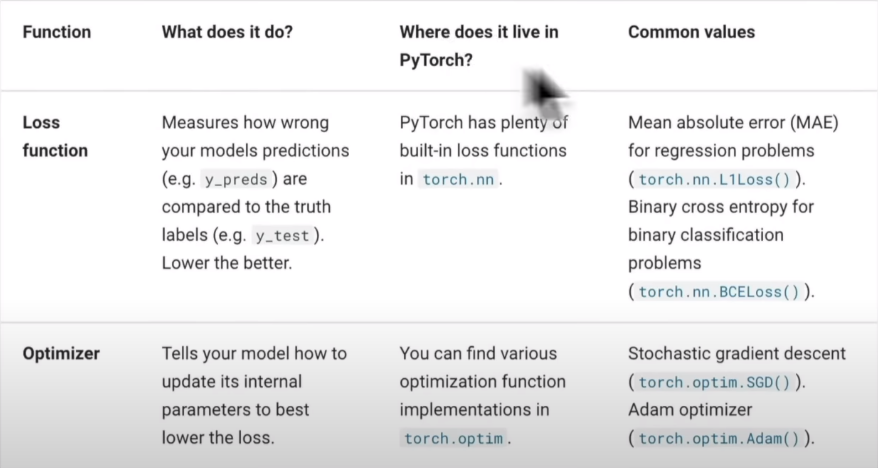

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.7681], requires_grad=True),
 Parameter containing:
 tensor([0.4802], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.7681])), ('bias', tensor([0.4802]))])

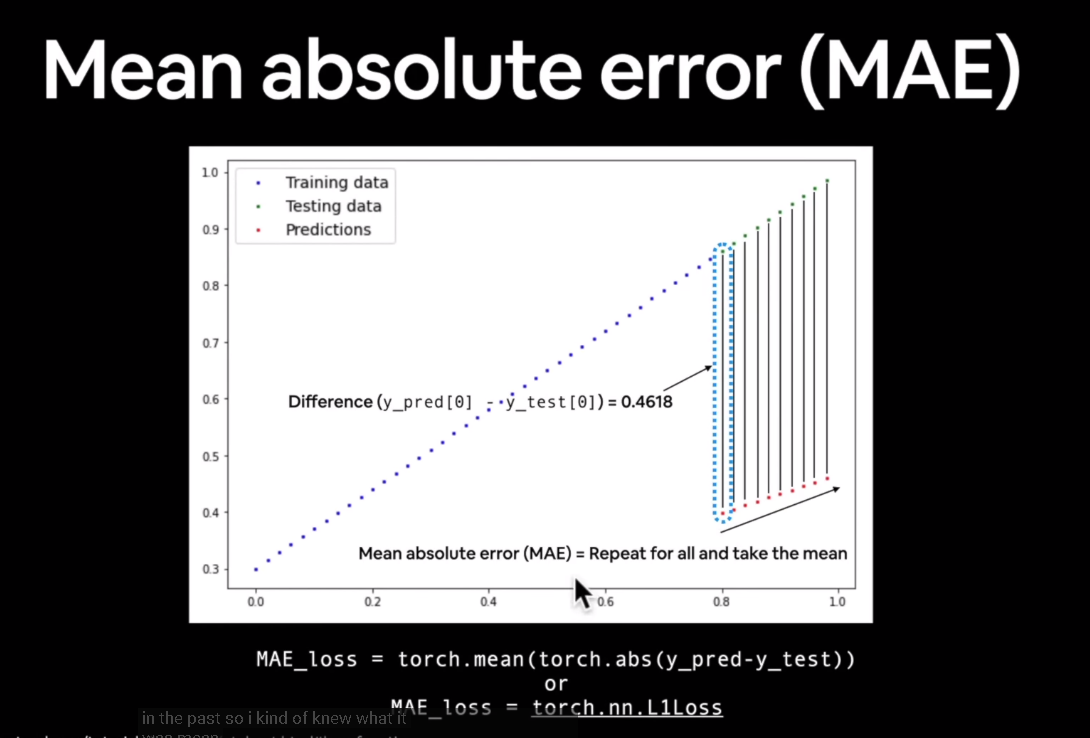

In [15]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)
loss_fn

L1Loss()

## Building a training loop and a testing loop in PyTorch






0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() functions)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward
5. Optimizer step


In [17]:
y_preds = model_0(X_test)
y_preds[:5]

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867]], grad_fn=<SliceBackward0>)

In [18]:
y_pred.shape, y_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

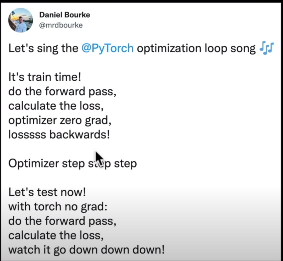

In [19]:
torch.manual_seed(42)

epochs = 100
### Training
# 0. Loop through the data
for epoch in range(epochs):

  #Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that require graidents to require gradients
  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: ", loss)
  # 3.Optimizer zero grad

  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... We have to zero them above in step 3 for the next iteration of the loop

### Testing
  model_0.eval() # Turns off gradient tracking

  # Print out model state dict()
  print(model_0.state_dict())



Loss:  tensor(0.0817, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Loss:  tensor(0.0795, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3428])), ('bias', tensor([0.3969]))])
Loss:  tensor(0.0777, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3458])), ('bias', tensor([0.3999]))])
Loss:  tensor(0.0760, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3486])), ('bias', tensor([0.4024]))])
Loss:  tensor(0.0745, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3515])), ('bias', tensor([0.4049]))])
Loss:  tensor(0.0731, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3542])), ('bias', tensor([0.4069]))])
Loss:  tensor(0.0720, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3569])), ('bias', tensor([0.4089]))])
Loss:  tensor(0.0708, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.3596])), ('bias', tensor([0.4109]))])
Loss:  tensor(0.0698, grad_fn=<MeanBackw

Training and Testing Loop Together!

In [20]:
torch.manual_seed(42)

epochs = 100
### Training
# 0. Loop through the data
for epoch in range(epochs):

  #Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that require graidents to require gradients
  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: ", loss)
  # 3.Optimizer zero grad

  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... We have to zero them above in step 3 for the next iteration of the loop

### Testing
  model_0.eval() # Turns off gradient tracking

  with torch.inference_mode(): # Turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  #Prit out what's happenin'
  if epoch %10 == 0:
    print(f"Epoch: ", epoch , "Test: ", loss, "Test loss: ", test_loss)
    # Print out model state dict()
    print(model_0.state_dict())




Loss:  tensor(0.0346, grad_fn=<MeanBackward0>)
Epoch:  0 Test:  tensor(0.0346, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0805)
OrderedDict([('weights', tensor([0.5293])), ('bias', tensor([0.3714]))])
Loss:  tensor(0.0343, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0340, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0336, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0333, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0329, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0326, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0322, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0319, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0316, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0312, grad_fn=<MeanBackward0>)
Epoch:  10 Test:  tensor(0.0312, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0722)
OrderedDict([('weights', tensor([0.5464])), ('bias', tensor([0.3644]))])
Loss:  tensor(0.0309, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0305, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0302, grad_fn=<MeanBackward0>)
Loss:  tensor(0.0298, grad_

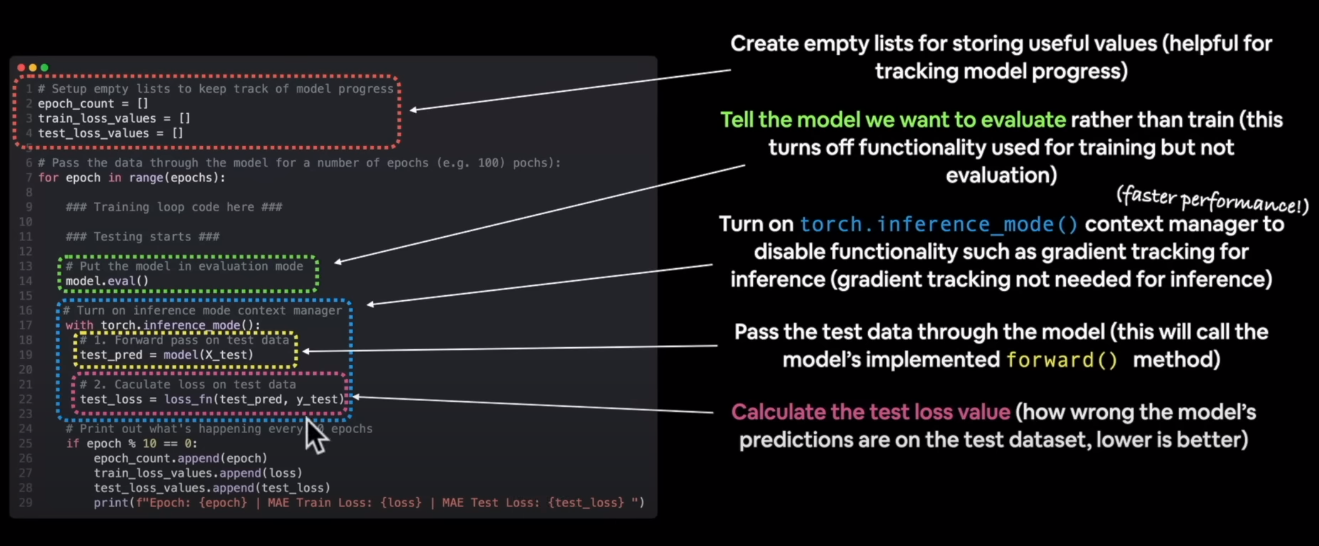

**Q:** Why torch.no_grad() is faster?

**A:** torch.no_grad() is a context manager in PyTorch that disables gradient computation during a forward pass, optimizing memory usage and computation for faster execution.

**Q:** What is gradient computation?

**A:** Gradient computation refers to the process of calculating the gradients or derivatives of a function with respect to its input variables.

Save a PyTorch Model

Three main methods you should know about for saving and loading models in PyTorch

* 'torch.save()' - Allows you save a PyTorch object in Python's pickle format
* 'torch.load()' - Allows you load a saved PyTorch object
* 'torch.nn.Module.load_state_dict()' - This allows to load model's saved state dictionary

In [21]:
torch.save(model_0, "Model")

In [22]:
torch.load("/content/Model")

LinearRegressionModel()

Putting it all together

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

Data

In [24]:
# y = weight * X + bias
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
y = weight * X + bias
X[:3], y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [25]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Building a PyTorch Linear Model

In [26]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features= 1, # 1 value by X_train
                                  out_features = 1) #1 value by y_train
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 , "          " , list(model_1.state_dict())

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 '          ',
 ['linear_layer.weight', 'linear_layer.bias'])

In [27]:
next(model_1.parameters()).device

device(type='cpu')

Training

* Loss Function
* Optimizer
* Training loop
* Testing loop

In [30]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(model_1.parameters(),lr = 0.01)

In [36]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 20 == 0:
    print("Epoch: ", epoch, "Loss: ", loss, "Test loss: ", test_loss)

Epoch:  0 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  20 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  40 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  60 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  80 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  100 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  120 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  140 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  160 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)
Epoch:  180 Loss:  tensor(0.0013, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0138)


In [37]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])